In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import  matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,precision_score,recall_score,f1_score
from sklearn.model_selection import train_test_split,GridSearchCV
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')
sns.set_style("whitegrid", {"grid.linestyle": "-"})
custom_palette = ["#99e6b3", "#7fffd4", "#66cdaa", "#00ffff", "#29ab87"]


In [2]:
df=pd.read_csv(r"D:\CognoRise\diabetis\diabetes_prediction_dataset.csv")
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [3]:
for i in df.columns:
    print(i)
    print('-'*10)
    print(len(df[i].unique()))
    print('-'*10)
    print(df[i].unique())
    print('*'*50)

gender
----------
3
----------
['Female' 'Male' 'Other']
**************************************************
age
----------
102
----------
[80.   54.   28.   36.   76.   20.   44.   79.   42.   32.   53.   78.
 67.   15.   37.   40.    5.   69.   72.    4.   30.   45.   43.   50.
 41.   26.   34.   73.   77.   66.   29.   60.   38.    3.   57.   74.
 19.   46.   21.   59.   27.   13.   56.    2.    7.   11.    6.   55.
  9.   62.   47.   12.   68.   75.   22.   58.   18.   24.   17.   25.
  0.08 33.   16.   61.   31.    8.   49.   39.   65.   14.   70.    0.56
 48.   51.   71.    0.88 64.   63.   52.    0.16 10.   35.   23.    0.64
  1.16  1.64  0.72  1.88  1.32  0.8   1.24  1.    1.8   0.48  1.56  1.08
  0.24  1.4   0.4   0.32  1.72  1.48]
**************************************************
hypertension
----------
2
----------
[0 1]
**************************************************
heart_disease
----------
2
----------
[1 0]
**************************************************
smoking_hi

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [5]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [6]:
gendgrp=df.groupby(['gender','diabetes']).size()

In [7]:
gendgrp

gender  diabetes
Female  0           54091
        1            4461
Male    0           37391
        1            4039
Other   0              18
dtype: int64

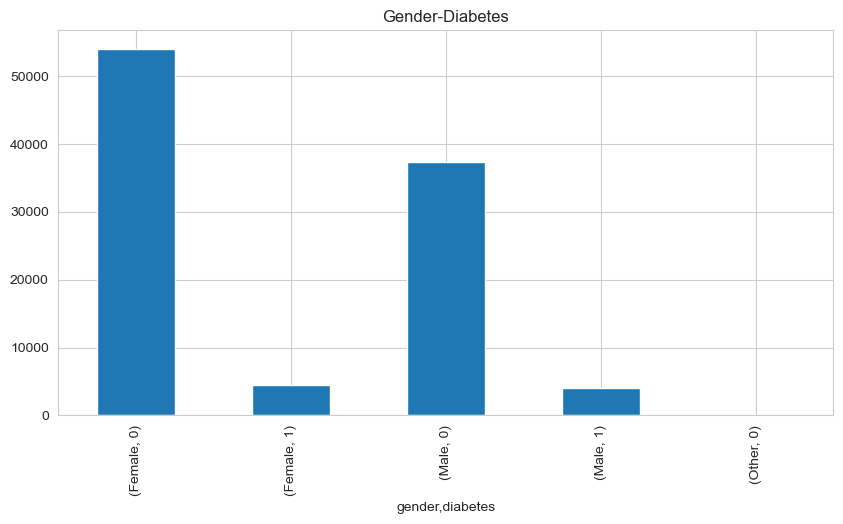

In [9]:
plt.title('Gender-Diabetes')
gendgrp.plot(kind='bar',figsize=(10,5))
sns.set_palette(custom_palette)
plt.show()

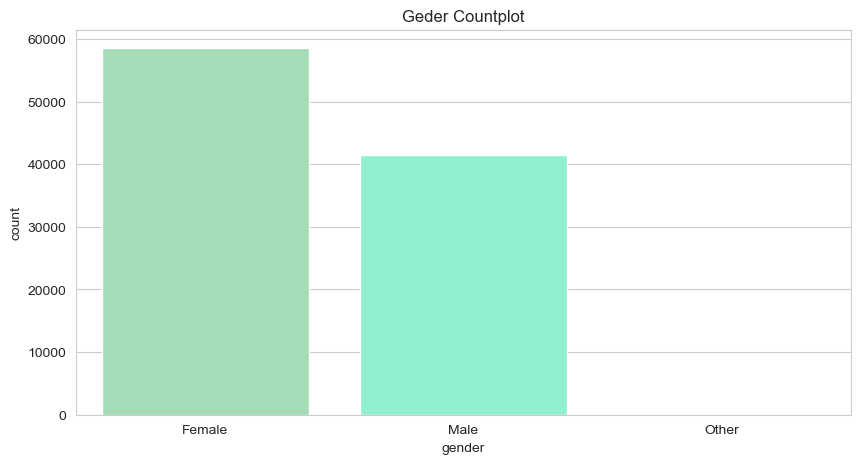

In [11]:
plt.figure(figsize=(10,5))
plt.title('Geder Countplot')
sns.countplot(x='gender',data=df)
sns.set_palette(custom_palette)
plt.show()

In [12]:
gendgrp2=df.groupby('gender').agg('mean')

In [13]:
gendgrp2

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
gender,,,,,,,
Female,42.463291,0.071680,0.026677,27.449287,5.509477,137.468951,0.076189
Male,41.075139,0.079363,0.057446,27.139108,5.553041,138.890031,0.097490
Other,29.555556,0.000000,0.000000,27.379444,5.405556,139.444444,0.000000


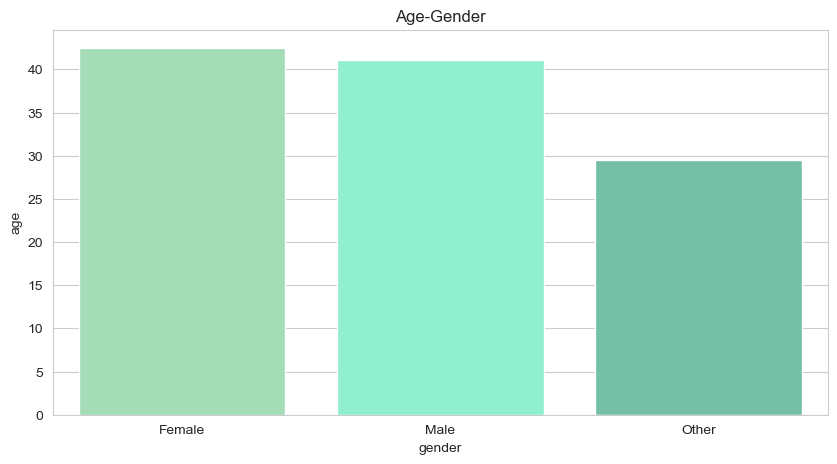

In [14]:
plt.figure(figsize=(10,5))
plt.title('Age-Gender')
sns.barplot(x=gendgrp2.index,y=gendgrp2['age'])
sns.set_palette(custom_palette)
plt.show()

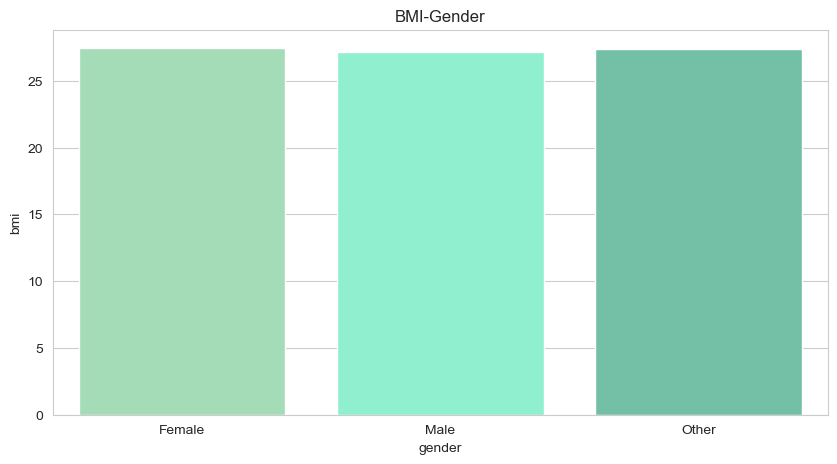

In [15]:
plt.figure(figsize=(10,5))
plt.title('BMI-Gender')
sns.barplot(x=gendgrp2.index,y=gendgrp2['bmi'])
sns.set_palette(custom_palette)
plt.show()

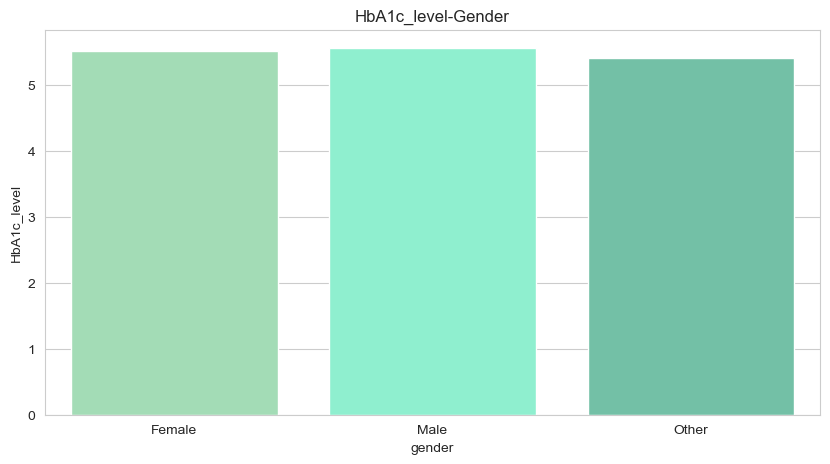

In [16]:
plt.figure(figsize=(10,5))
plt.title('HbA1c_level-Gender')
sns.barplot(x=gendgrp2.index,y=gendgrp2['HbA1c_level'])
sns.set_palette(custom_palette)
plt.show()

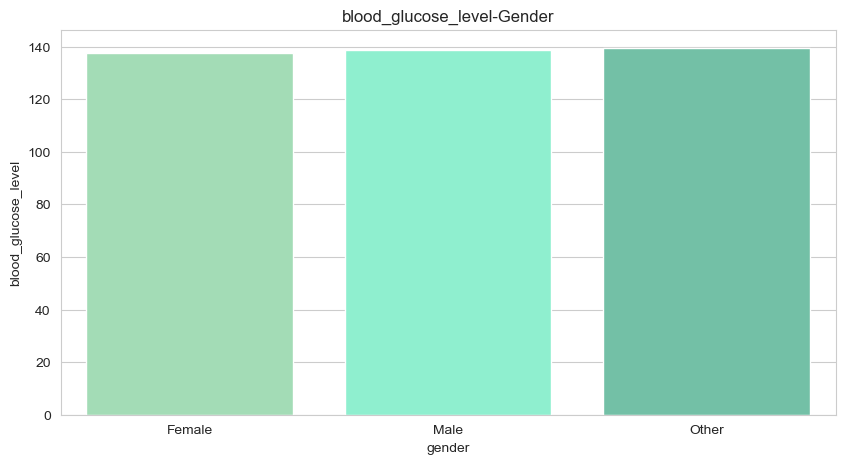

In [17]:
plt.figure(figsize=(10,5))
plt.title('blood_glucose_level-Gender')
sns.barplot(x=gendgrp2.index,y=gendgrp2['blood_glucose_level'])
sns.set_palette(custom_palette)
plt.show()

In [18]:
gendgrp3=df.groupby(['gender','hypertension']).size()

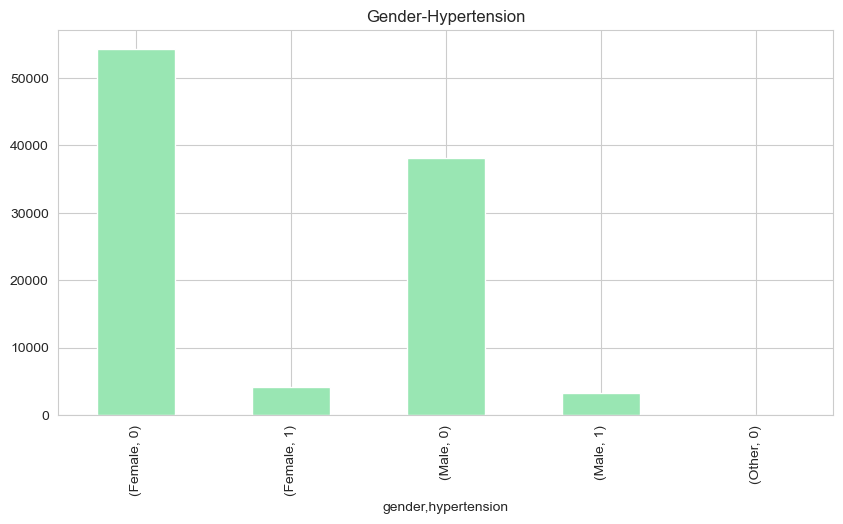

In [19]:
plt.title('Gender-Hypertension')
gendgrp3.plot(kind='bar',figsize=(10,5))
sns.set_palette(custom_palette)
plt.show()

In [20]:
gendgrp4=df.groupby(['gender','heart_disease']).size()

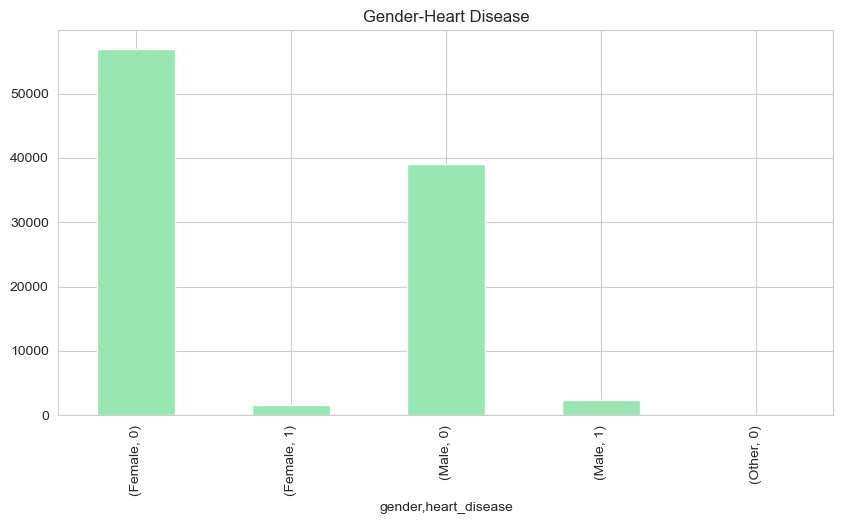

In [22]:
plt.title('Gender-Heart Disease')
gendgrp4.plot(kind='bar',figsize=(10,5))
sns.set_palette(custom_palette)
sns.set_palette(custom_palette)
plt.show()

In [23]:
gendgrp5=df.groupby(['gender','smoking_history']).size()

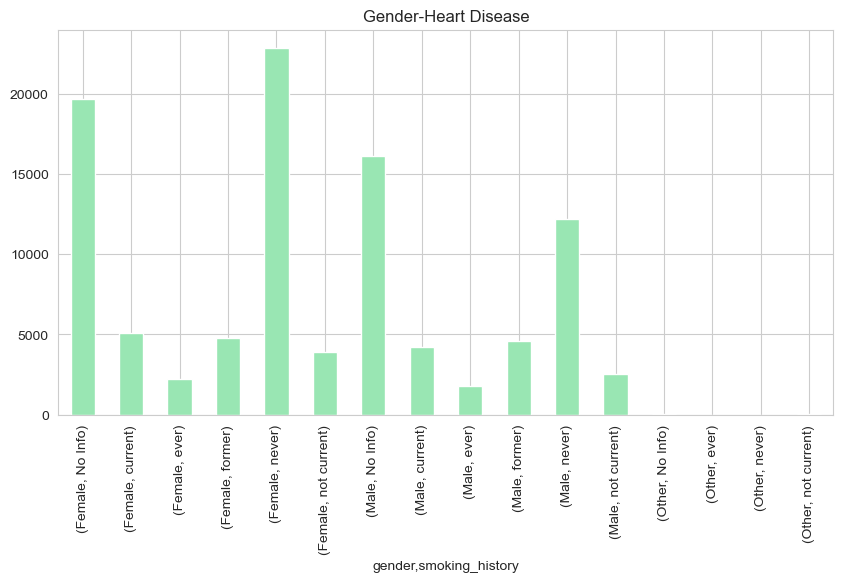

In [24]:
plt.title('Gender-Heart Disease')
gendgrp5.plot(kind='bar',figsize=(10,5))
sns.set_palette(custom_palette)
plt.show()

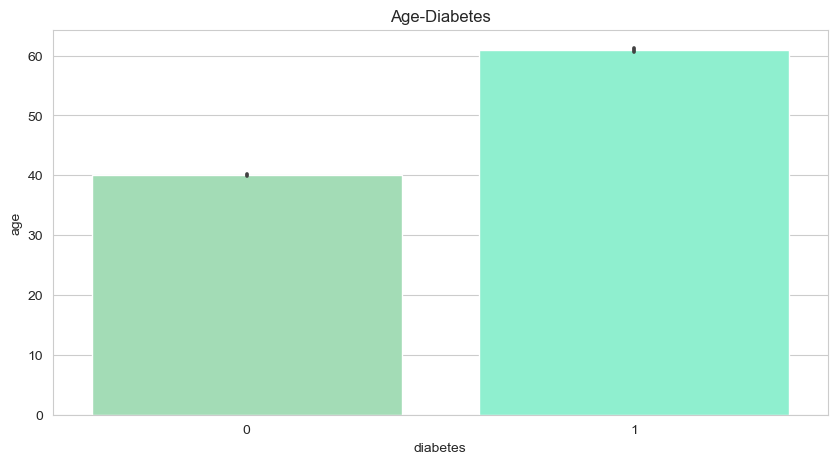

In [25]:
plt.figure(figsize=(10,5))
plt.title('Age-Diabetes')
sns.barplot(x='diabetes',y='age',data=df)
sns.set_palette(custom_palette)
plt.show()

In [27]:
catcol=df.select_dtypes(object).columns
label=LabelEncoder()
for i in catcol:
    df[i]=label.fit_transform(df[i])

In [28]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,0,80.0,0,0,0,27.32,6.2,90,0
99996,0,2.0,0,0,0,17.37,6.5,100,0
99997,1,66.0,0,0,3,27.83,5.7,155,0
99998,0,24.0,0,0,4,35.42,4.0,100,0


In [29]:
features=df.drop('diabetes',axis=1)
target=df['diabetes']
stds=StandardScaler()
features=stds.fit_transform(features)

In [30]:
index_columns = ['train_accuracy', 'train_precision', 'train_recall', 'train_f1score',
                'test_accuracy', 'test_precision', 'test_recall', 'test_f1score']
result=pd.DataFrame(index=index_columns)

In [31]:
def model_building(model,model_name):
    '''model,features,model name'''
    
    x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.8,random_state=100)
    
    model1=model.fit(x_train,y_train)
    train_predict=model1.predict(x_train)
    train_conf=confusion_matrix(y_train,train_predict)
    train_classfi=classification_report(y_train,train_predict)
    train_accuracy=accuracy_score(y_train,train_predict)
    train_precision=precision_score(y_train,train_predict,average='macro')
    train_recall=recall_score(y_train,train_predict,average='macro')
    train_f1score=f1_score(y_train,train_predict,average='macro')
    
    test_predict=model1.predict(x_test)
    test_conf=confusion_matrix(y_test,test_predict)
    test_classfi=classification_report(y_test,test_predict)
    test_accuracy=accuracy_score(y_test,test_predict)
    test_precision=precision_score(y_test,test_predict,average='macro')
    test_recall=recall_score(y_test,test_predict,average='macro')
    test_f1score=f1_score(y_test,test_predict,average='macro')
    
    result[model_name]=train_accuracy,train_precision,train_recall,train_f1score,test_accuracy,test_precision,test_recall,test_f1score
    
    plt.figure(figsize=(5,3))
    sns.heatmap(test_conf,annot=True,fmt='.2f')
    plt.show()
    print('-'*30,'>','Train Classification Report','<','-'*30)
    print(train_classfi)
    print()
    print('-'*30,'>','Test Classification Report','<','-'*30)
    print(test_classfi)
    

In [32]:
def tuning(model,params):
    '''model,params,features'''
    grid=GridSearchCV(model,params,verbose=3)
    x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.8,random_state=100)
    grid.fit(x_train,y_train)
    bestp=grid.best_params_
    return bestp

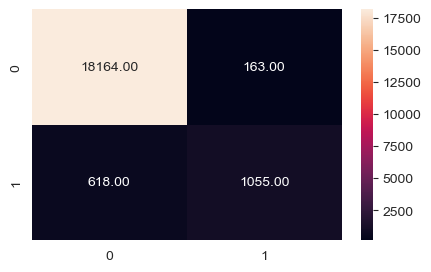

------------------------------ > Train Classification Report < ------------------------------
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     73173
           1       0.87      0.63      0.73      6827

    accuracy                           0.96     80000
   macro avg       0.92      0.81      0.85     80000
weighted avg       0.96      0.96      0.96     80000


------------------------------ > Test Classification Report < ------------------------------
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     18327
           1       0.87      0.63      0.73      1673

    accuracy                           0.96     20000
   macro avg       0.92      0.81      0.85     20000
weighted avg       0.96      0.96      0.96     20000



In [33]:
model_building(LogisticRegression(),'LogisticRegression')

In [34]:
params={'max_depth':[2,4,8,10,None],'criterion':['entropy','gini'],'max_features':[0.25,0.5,0.75,1.0,None],'min_samples_split':[2,4,6,8]}
#tuning(DecisionTreeClassifier(),params)

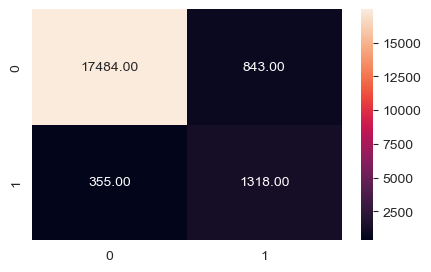

------------------------------ > Train Classification Report < ------------------------------
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     73173
           1       0.79      1.00      0.88      6827

    accuracy                           0.98     80000
   macro avg       0.89      0.99      0.93     80000
weighted avg       0.98      0.98      0.98     80000


------------------------------ > Test Classification Report < ------------------------------
              precision    recall  f1-score   support

           0       0.98      0.95      0.97     18327
           1       0.61      0.79      0.69      1673

    accuracy                           0.94     20000
   macro avg       0.80      0.87      0.83     20000
weighted avg       0.95      0.94      0.94     20000



In [35]:
model_building(DecisionTreeClassifier(criterion='entropy',max_depth=None,max_features=None,min_samples_split=8,class_weight='balanced'),'Decisiontree')

In [20]:
paramsR={'n_estimators':[100,150],'max_depth':[2,4,8,10,None],'criterion':['entropy','gini'],'max_features':[0.25,0.5,1.0,None,'sqrt','log2'],'min_samples_split':[2,4,5,6]}
#tuning(RandomForestClassifier(),paramsR)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits
[CV 1/5] END criterion=entropy, max_depth=2, max_features=0.25, min_samples_split=2, n_estimators=100;, score=0.933 total time=   2.6s
[CV 2/5] END criterion=entropy, max_depth=2, max_features=0.25, min_samples_split=2, n_estimators=100;, score=0.952 total time=   3.4s
[CV 3/5] END criterion=entropy, max_depth=2, max_features=0.25, min_samples_split=2, n_estimators=100;, score=0.933 total time=   1.6s
[CV 4/5] END criterion=entropy, max_depth=2, max_features=0.25, min_samples_split=2, n_estimators=100;, score=0.949 total time=   1.9s
[CV 5/5] END criterion=entropy, max_depth=2, max_features=0.25, min_samples_split=2, n_estimators=100;, score=0.947 total time=   2.1s
[CV 1/5] END criterion=entropy, max_depth=2, max_features=0.25, min_samples_split=2, n_estimators=150;, score=0.930 total time=   3.0s
[CV 2/5] END criterion=entropy, max_depth=2, max_features=0.25, min_samples_split=2, n_estimators=150;, score=0.945 total time

{'criterion': 'gini',
 'max_depth': 10,
 'max_features': 1.0,
 'min_samples_split': 4,
 'n_estimators': 150}

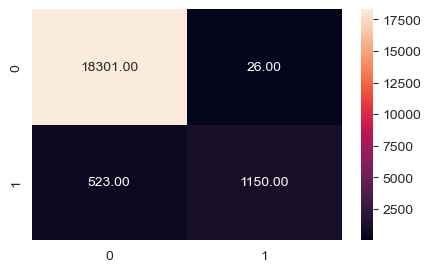

------------------------------ > Train Classification Report < ------------------------------
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     73173
           1       0.99      0.68      0.81      6827

    accuracy                           0.97     80000
   macro avg       0.98      0.84      0.90     80000
weighted avg       0.97      0.97      0.97     80000


------------------------------ > Test Classification Report < ------------------------------
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     18327
           1       0.98      0.69      0.81      1673

    accuracy                           0.97     20000
   macro avg       0.98      0.84      0.90     20000
weighted avg       0.97      0.97      0.97     20000



In [36]:
model_building(RandomForestClassifier(criterion='gini',max_depth=10,max_features=1.0,min_samples_split=4,n_estimators=150),'RandomForest')

In [37]:
result

,LogisticRegression,Decisiontree,RandomForest
train_accuracy,0.959987,0.976725,0.972575
train_precision,0.916216,0.892853,0.981647
train_recall,0.809524,0.987277,0.841838
train_f1score,0.853302,0.933554,0.897517
test_accuracy,0.960950,0.940100,0.972550
test_precision,0.916635,0.795001,0.975054
test_recall,0.810855,0.870904,0.842985
test_f1score,0.854403,0.827204,0.896262
